In [1]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/graduate-admissions/admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(400, 9)

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df = df.rename(index=str, columns={"Chance of Admit ": "Admit_Probability"})

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df = df[[
    'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit_Probability'
]]

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<Figure size 720x432 with 0 Axes>

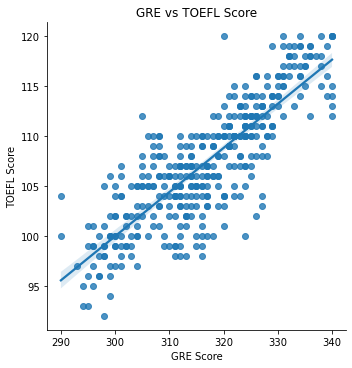

In [13]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='GRE Score', y='TOEFL Score', data=df, fit_reg=True);
plt.title('GRE vs TOEFL Score');
plt.show();

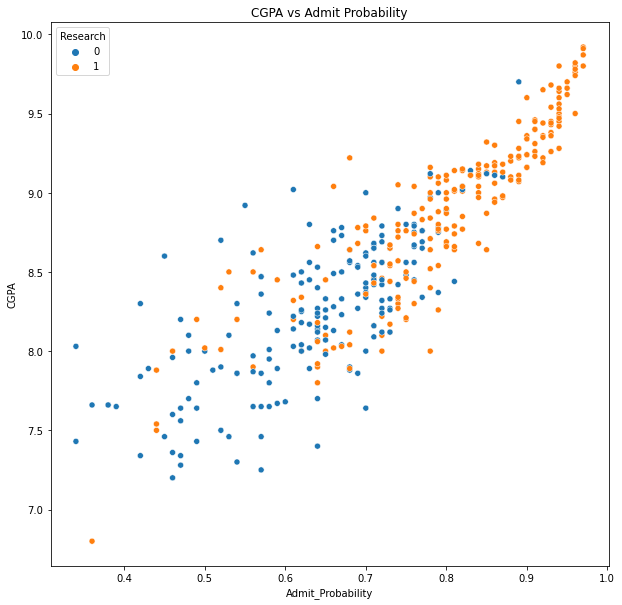

In [14]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='Admit_Probability', y='CGPA', data=df, hue='Research')
plt.title('CGPA vs Admit Probability')
plt.show();

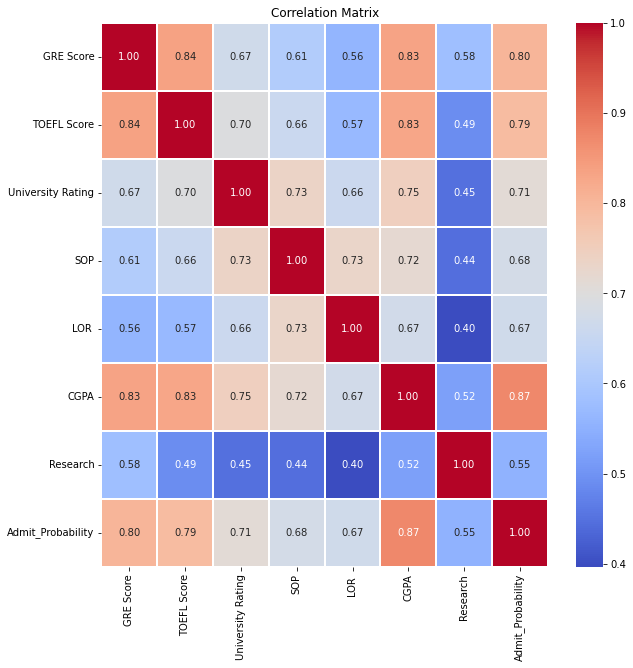

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.05, fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

In [16]:
from sklearn import preprocessing

In [17]:
df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = \
    preprocessing.scale(df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [19]:
cols = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = df[cols]
target = df[['Admit_Probability']]

In [23]:
y = target.copy()
def encode(value):
    if value >= 0.8:
        return int(2)
    elif value >= 0.6:
        return int(1)
    else:
        return int(0)

y['Admit_Probability'] = y['Admit_Probability'].apply(encode)

In [24]:
y.value_counts()

Admit_Probability
1                    199
2                    128
0                     73
dtype: int64

In [25]:
target = y

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 5), (80, 5), (320, 1), (80, 1))

In [47]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values.reshape(1, -1)[0], dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values.reshape(1, -1)[0], dtype=torch.long)

In [48]:
X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape

(torch.Size([320, 5]),
 torch.Size([80, 5]),
 torch.Size([320]),
 torch.Size([80]))

In [49]:
import torch.nn as nn
import torch.nn.functional as F # functional API gives us more control over the model

In [50]:
input_size = X_train_tensor.shape[1]
output_size = len(y_train_tensor.unique())

In [51]:
class Net(nn.Module):

    activation_dict = {
        'relu': torch.relu,
        'sigmoid': torch.sigmoid,
        'tanh': torch.tanh,
    }
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(p=0.2)
    
    def forward(self, x):

        activation_fn = Net.activation_dict[self.activation_fn]

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout:
            x = self.dropout(x)
        
        x = self.fc3(x)

        return F.log_softmax(x, dim=-1)


        


In [67]:
def train_and_evaluate_model(model, learning_rate=0.001, epochs=1000):
    epoch_data = []
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    loss_fn = nn.NLLLoss() # negative log likelihood loss -- used when log_softmax is applied

    test_accuracy = 0.0

    for epoch in range(1, epochs + 1):

        optimizer.zero_grad()

        model.train() # set model to training mode

        y_pred = model(X_train_tensor)
        loss = loss_fn(y_pred, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        model.eval() # set model to evaluation mode
        
        y_pred_test = model(X_test_tensor)
        loss_test = loss_fn(y_pred_test, y_test_tensor)
        _, pred = y_pred_test.data.max(1)

        test_accuracy = pred.eq(y_test_tensor.data).sum().item() / y_test_tensor.shape[0]
        epoch_data.append([epoch, loss.item(), loss_test.item(), test_accuracy])

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs} Loss: {loss.item():.4f} Test Loss: {loss_test.item():.4f} Test Accuracy: {test_accuracy:.4f}')
        
    return {
        'model' : model,
        'epoch_data' : epoch_data,
        'num_epochs' : epochs,
        'optimizer' : optimizer,
        'loss_fn' : loss_fn,
        'test_accuracy' : test_accuracy,
        '_, pred' : y_pred_test.data.max(1),
        'actual_test_label' : y_test_tensor,
    }



In [68]:
net = Net(hidden_size=3, apply_dropout=False, activation_fn='sigmoid')
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [69]:
result_3_sigmoid = train_and_evaluate_model(net)

Epoch: 100/1000 Loss: 1.2781 Test Loss: 1.2291 Test Accuracy: 0.2125
Epoch: 200/1000 Loss: 1.1537 Test Loss: 1.1291 Test Accuracy: 0.2125
Epoch: 300/1000 Loss: 1.0547 Test Loss: 1.0501 Test Accuracy: 0.6750
Epoch: 400/1000 Loss: 0.9773 Test Loss: 0.9854 Test Accuracy: 0.4250
Epoch: 500/1000 Loss: 0.9170 Test Loss: 0.9301 Test Accuracy: 0.6250
Epoch: 600/1000 Loss: 0.8678 Test Loss: 0.8793 Test Accuracy: 0.7000
Epoch: 700/1000 Loss: 0.8244 Test Loss: 0.8308 Test Accuracy: 0.7125
Epoch: 800/1000 Loss: 0.7848 Test Loss: 0.7850 Test Accuracy: 0.7375
Epoch: 900/1000 Loss: 0.7497 Test Loss: 0.7436 Test Accuracy: 0.7250
Epoch: 1000/1000 Loss: 0.7199 Test Loss: 0.7079 Test Accuracy: 0.7375


In [70]:
net = Net(hidden_size=3, apply_dropout=True, activation_fn='sigmoid')
result_3_sigmoid_dropout = train_and_evaluate_model(net, learning_rate=0.001, epochs=10000)

Epoch: 100/10000 Loss: 1.0102 Test Loss: 1.0602 Test Accuracy: 0.4250
Epoch: 200/10000 Loss: 1.0001 Test Loss: 1.0444 Test Accuracy: 0.4250
Epoch: 300/10000 Loss: 0.9579 Test Loss: 1.0069 Test Accuracy: 0.4250
Epoch: 400/10000 Loss: 0.9257 Test Loss: 0.9504 Test Accuracy: 0.4250
Epoch: 500/10000 Loss: 0.8813 Test Loss: 0.8872 Test Accuracy: 0.6875
Epoch: 600/10000 Loss: 0.8377 Test Loss: 0.8274 Test Accuracy: 0.7250
Epoch: 700/10000 Loss: 0.8097 Test Loss: 0.7755 Test Accuracy: 0.7250
Epoch: 800/10000 Loss: 0.7448 Test Loss: 0.7333 Test Accuracy: 0.7250
Epoch: 900/10000 Loss: 0.7271 Test Loss: 0.6991 Test Accuracy: 0.7125
Epoch: 1000/10000 Loss: 0.7235 Test Loss: 0.6722 Test Accuracy: 0.7125
Epoch: 1100/10000 Loss: 0.6992 Test Loss: 0.6513 Test Accuracy: 0.7250
Epoch: 1200/10000 Loss: 0.6776 Test Loss: 0.6342 Test Accuracy: 0.7250
Epoch: 1300/10000 Loss: 0.6901 Test Loss: 0.6209 Test Accuracy: 0.7250
Epoch: 1400/10000 Loss: 0.6657 Test Loss: 0.6094 Test Accuracy: 0.7250
Epoch: 1500/100

In [76]:
net = Net(hidden_size=50, apply_dropout=True, activation_fn='relu')
result_50_relu_dropout = train_and_evaluate_model(net, learning_rate=0.001, epochs=1000)

Epoch: 100/1000 Loss: 0.4267 Test Loss: 0.4876 Test Accuracy: 0.8000
Epoch: 200/1000 Loss: 0.3732 Test Loss: 0.5023 Test Accuracy: 0.8000
Epoch: 300/1000 Loss: 0.3661 Test Loss: 0.5162 Test Accuracy: 0.8375
Epoch: 400/1000 Loss: 0.3232 Test Loss: 0.5259 Test Accuracy: 0.8250
Epoch: 500/1000 Loss: 0.2967 Test Loss: 0.5414 Test Accuracy: 0.8125
Epoch: 600/1000 Loss: 0.2664 Test Loss: 0.5632 Test Accuracy: 0.8125
Epoch: 700/1000 Loss: 0.2441 Test Loss: 0.5940 Test Accuracy: 0.8250
Epoch: 800/1000 Loss: 0.2255 Test Loss: 0.6271 Test Accuracy: 0.8250
Epoch: 900/1000 Loss: 0.1930 Test Loss: 0.6883 Test Accuracy: 0.8250
Epoch: 1000/1000 Loss: 0.1567 Test Loss: 0.7193 Test Accuracy: 0.8250


In [77]:
import matplotlib.pyplot as plt

In [78]:
epoch_data = pd.DataFrame(
    result_50_relu_dropout['epoch_data'],
    columns=['epoch', 'train_loss', 'test_loss', 'test_accuracy']
)

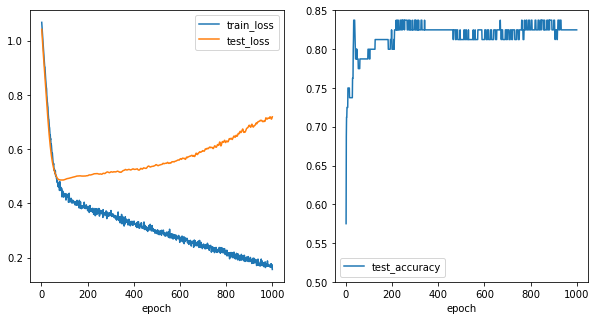

In [79]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
epoch_data.plot(x='epoch', y=['train_loss', 'test_loss'], ax=ax1)
epoch_data.plot(x='epoch', y=['test_accuracy'], ax=ax2)
plt.ylim(bottom=0.5)
plt.show();